$\textbf{Voltage and Bowl Calibration}$

$\text{After the cropping the dataset we can do the voltage and bowl correction to clibrate the data.}$

In [35]:
%matplotlib notebook
import os
import os.path as path
import numpy as np
from IPython.display import display

from pyccapt.calibration_tools import variables, tools, data_tools
from pyccapt.calibration_tools import widgets as wd
from pyccapt.mc import mc_tools

# The initial value for flight path length, which is the distance of local electrod to detector 
flightPathLength = 110 # 105.35 # mm 
# The initial value for t_0
t0 = 51.74 #68.48 # ns

# flightPathLength = 243 # 105.35 # mm 
# # The initial value for t_0
# t0 = 33 #68.48 # ns

In [39]:
variables.init()

tdc_model = 'surface_concept' # TDC model: surface_concept or roentdec

# dataset name
# dataset_name = 'AL_data_b'
# dataset_name = 'OLO_AL_6_data'
# dataset_name = 'OLO_W_6_data'
# dataset_name = 'OLO_Ni_8_data'
# dataset_name = 'X6Cr17_2V30Min_5_data'
# dataset_name = "data_1029_Jun-27-2022_15-53_Pd"
dataset_name = "data_1040_Jul-14-2022_15-47_Vicente_W"
# dataset_name = 'LFIM5_BJ_G_Erbium_cooled_DAn'

p = path.abspath(path.join("", "../../../../.."))

variables.path = os.path.join(p, 'tests//results//load_crop')
variables.result_path = os.path.join(p, 'tests/results/vol_bowl_calibratin/' + dataset_name)
if not os.path.isdir(variables.result_path):
        os.makedirs(variables.result_path, mode=0o777, exist_ok=True)
        
filename = variables.path + '//' + dataset_name + '//' + dataset_name + '_cropped' + '.h5'



head, tail = os.path.split(filename)
figname = os.path.splitext(tail)[0]

data = data_tools.read_hdf5_through_pandas(filename)
print(data)

dld_highVoltage = data['dld/high_voltage'].to_numpy()
dld_pulseVoltage = data['dld/pulse_voltage'].to_numpy()
dld_startCounter = data['dld/start_counter'].to_numpy()
dld_t = data['dld/t'].to_numpy()
dld_x = data['dld/x'].to_numpy()
dld_y = data['dld/y'].to_numpy()

        dld/high_voltage  dld/pulse_voltage  dld/start_counter         dld/t  \
0            5545.164062        1109.032715            51889.0    916.413966   
1            5545.164062        1109.032715            52163.0    922.881060   
2            5545.164062        1109.032715            52539.0    931.227246   
3            5545.164062        1109.032715            52929.0    923.038794   
4            5545.164062        1109.032715            54115.0    938.990502   
...                  ...                ...                ...           ...   
207321      10315.629883        2063.125977             6982.0  30701.914974   
207322      10315.629883        2063.125977             7129.0  30722.653566   
207323      10315.629883        2063.125977             7361.0  30695.763348   
207324      10315.629883        2063.125977             7378.0  30933.132444   
207325      10315.629883        2063.125977             7414.0  30702.058992   

            dld/x      dld/y  
0       

In [40]:
# t0
dld_t = dld_t - t0

In [41]:
# Remove negative and zero TOF
threshold = 60
dld_highVoltage = dld_highVoltage[dld_t>threshold]
dld_pulseVoltage = dld_pulseVoltage[dld_t>threshold]
dld_startCounter = dld_startCounter[dld_t>threshold]
dld_x = dld_x[dld_t>threshold]
dld_y = dld_y[dld_t>threshold]
dld_t = dld_t[dld_t>threshold]

<IPython.core.display.Javascript object>


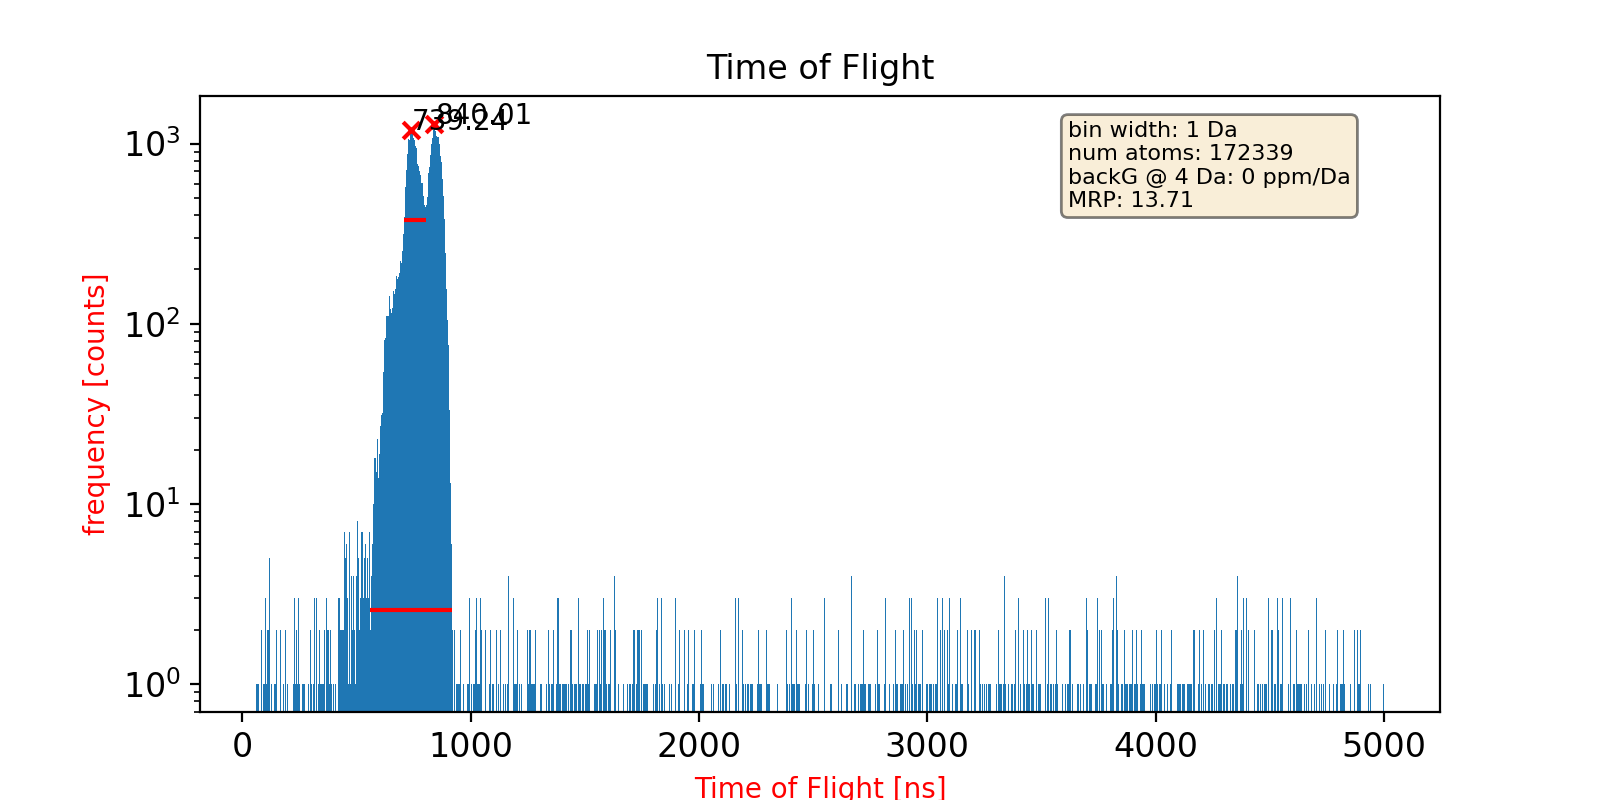

In [42]:
max_hist_tof, left_right_peaks_tof, peaks_sides_tof, max_paek_edges_tof, index_max_tof = tools.massSpecPlot(dld_t[dld_t < 5000], 1, distance=100, percent=50, prominence=100, plot=True, label='tof')

$\text{Plot the m/c. It is possible to modify the peak selection algorithm by seting different value for prominance and distance variable in massSpecPlot function.}$

<IPython.core.display.Javascript object>


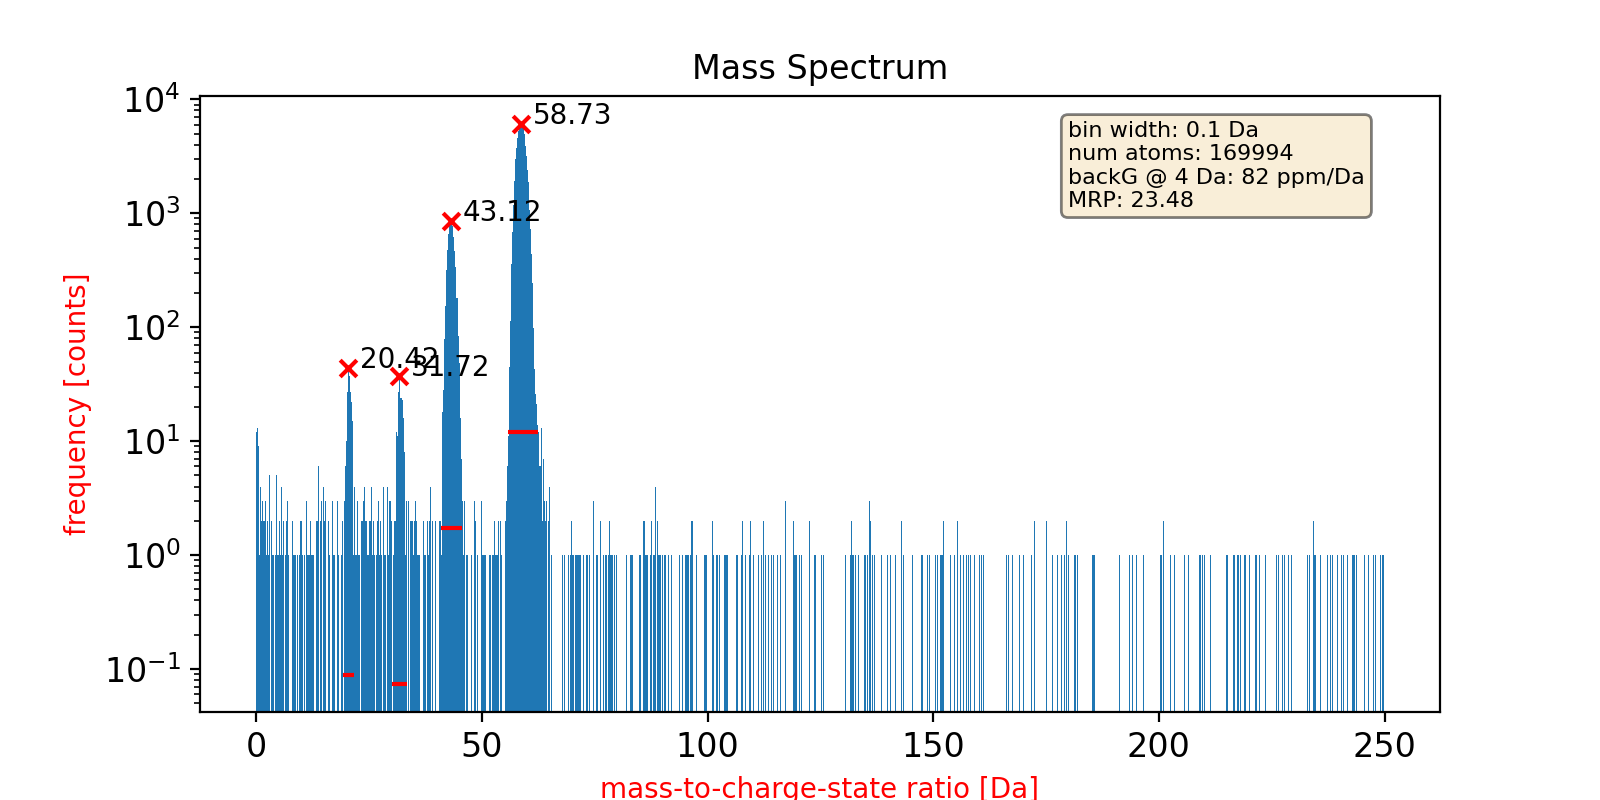

Mass resolving power for the highest peak (MRP --> m/m_2-m_1): [23.48347493]
Peaks  0 is: 20.42 peak window sides are: 20.02 - 20.92
Peaks  1 is: 31.72 peak window sides are: 31.22 - 32.42
Peaks  2 is: 43.12 peak window sides are: 42.12 - 44.02
Peaks  3 is: 58.73 peak window sides are: 57.43 - 59.93


In [43]:
mc_seb = mc_tools.tof2mc(dld_t, t0, dld_highVoltage, dld_pulseVoltage, dld_x, dld_y, flightPathLength, mode='voltage_pulse')
max_hist, left_right_peaks, peaks_sides, max_paek_edges, index_max = tools.massSpecPlot(mc_seb[mc_seb < 250], 0.1, peaks_find=True, percent=50, prominence=30, distance=50, plot=True, text_loc='right', fig_name=figname)
mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
print('Mass resolving power for the highest peak (MRP --> m/m_2-m_1):', mrp)
for i in range(len(peaks_sides)):
    print('Peaks ', i, 'is: {:.2f}'.format(peaks_sides[i,0]), 'peak window sides are: {:.2f} - {:.2f}'.format(peaks_sides[i,2], peaks_sides[i,3]))

$\text{Details of selected peaks is displayed below:}$

In [44]:
print('################ Before starting the colibration ################')
print('Maximum pick value:', max_hist, 'right-left side of the peak:', left_right_peaks)
mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
print('Mass resolving power (MRP --> m/m_2-m_1):', mrp)
for i in range(len(peaks_sides)):
    print('Peaks ', i, 'is: {:.2f}'.format(peaks_sides[i,0]), 'peak window sides are: {:.2f} - {:.2f}'.format(peaks_sides[i,2], peaks_sides[i,3]))
print('#################################################################')

################ Before starting the colibration ################
Maximum pick value: [58.72937331] right-left side of the peak: [57.42891526 59.92979613]
Mass resolving power (MRP --> m/m_2-m_1): [23.48347493]
Peaks  0 is: 20.42 peak window sides are: 20.02 - 20.92
Peaks  1 is: 31.72 peak window sides are: 31.22 - 32.42
Peaks  2 is: 43.12 peak window sides are: 42.12 - 44.02
Peaks  3 is: 58.73 peak window sides are: 57.43 - 59.93
#################################################################


$\text{User can tune/specify parameters below as per their requirements}$

In [45]:
mc_temp = mc_seb
mean_t = 0.001  # 0.3 the threshold by user instead of total mean
mrp_final = 0
iteration = 0
break_i = 0
ionsPerFitSegment = int(len(dld_t) / 70) # choose by dividing the dataset to 70 segments
print('Ions fit per segment is:',  ionsPerFitSegment)

Ions fit per segment is: 2953


$\text{Computation voltage and bowl correction based on the user-provided parameters. The loop breaks if there is no improvment in MRP for 3 itrations}$

(array([75], dtype=int64),)



<IPython.core.display.Javascript object>


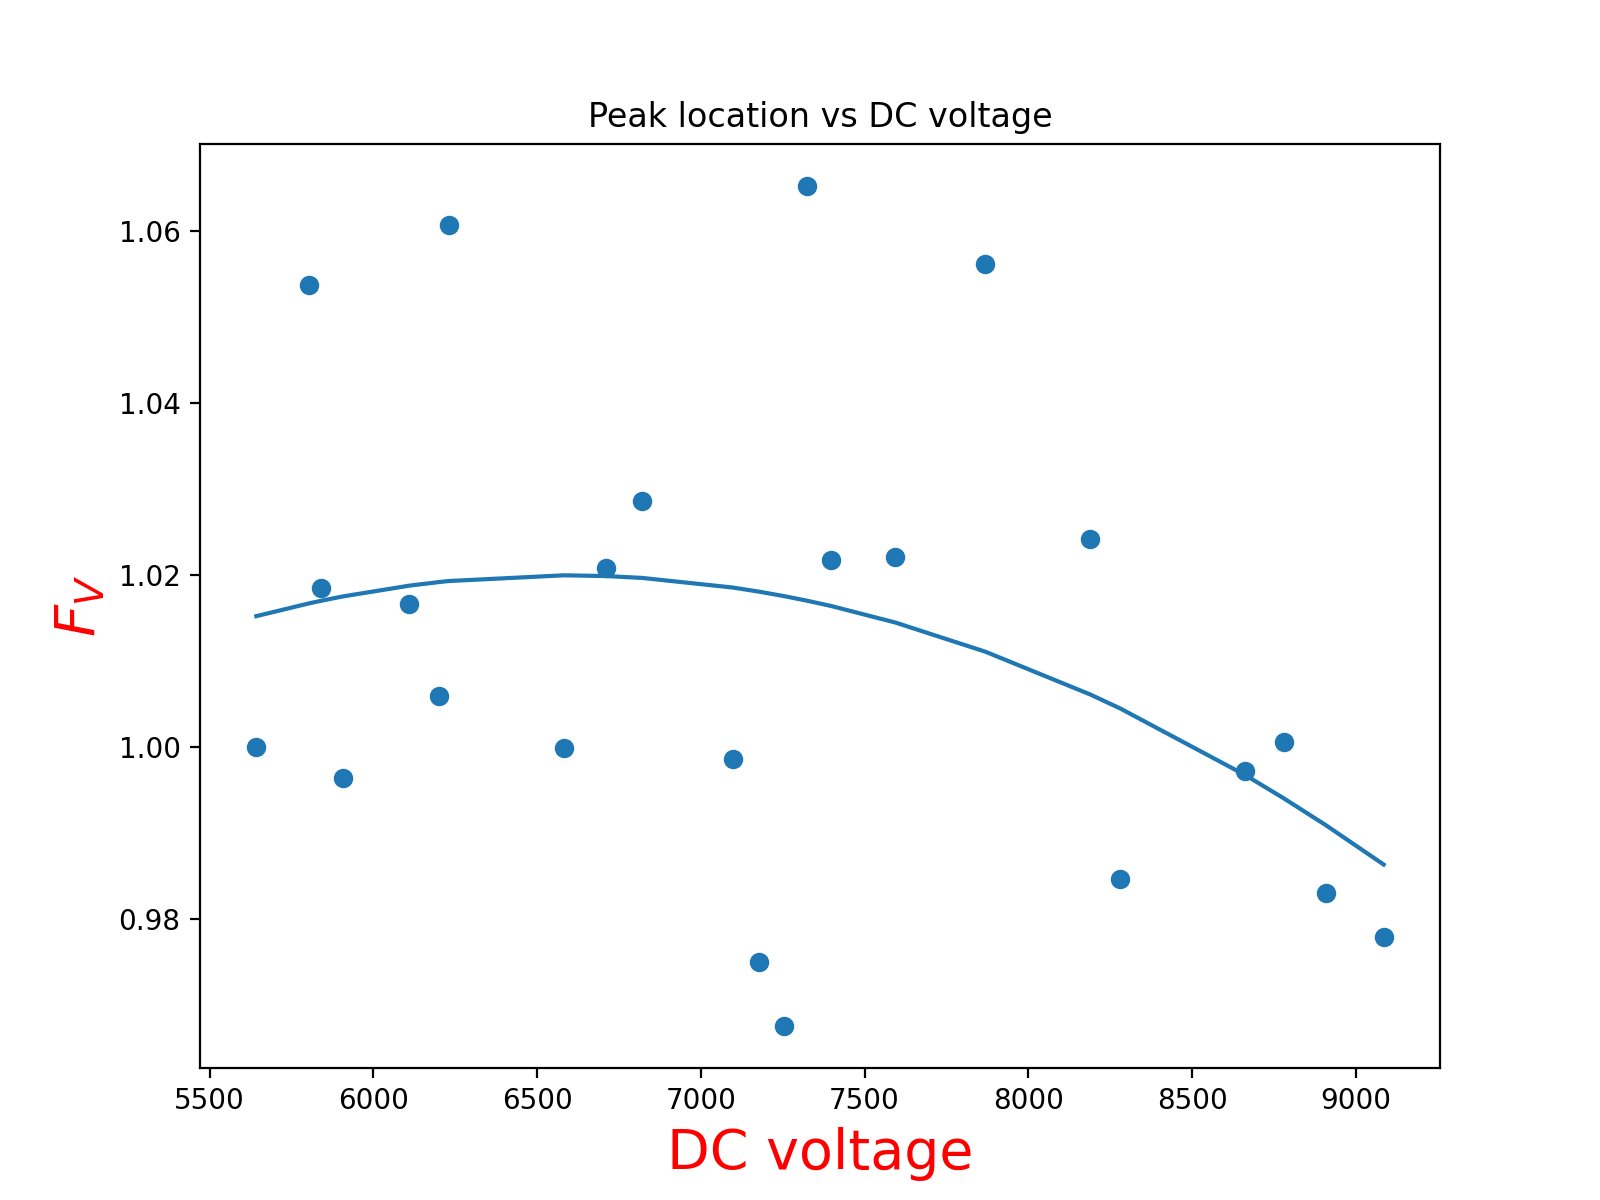

<IPython.core.display.Javascript object>


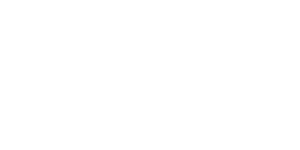

Iteration: 0 Voltage correction
Peaks in the 2D histogram [array([13.8671875]), array([15.8203125])]
Maximum pick value: [57.77714648] right-left side of the peak: [56.57571942 59.07869246]
Mass resolving power (MRP --> m/m_2-m_1): [23.08340745]


<IPython.core.display.Javascript object>


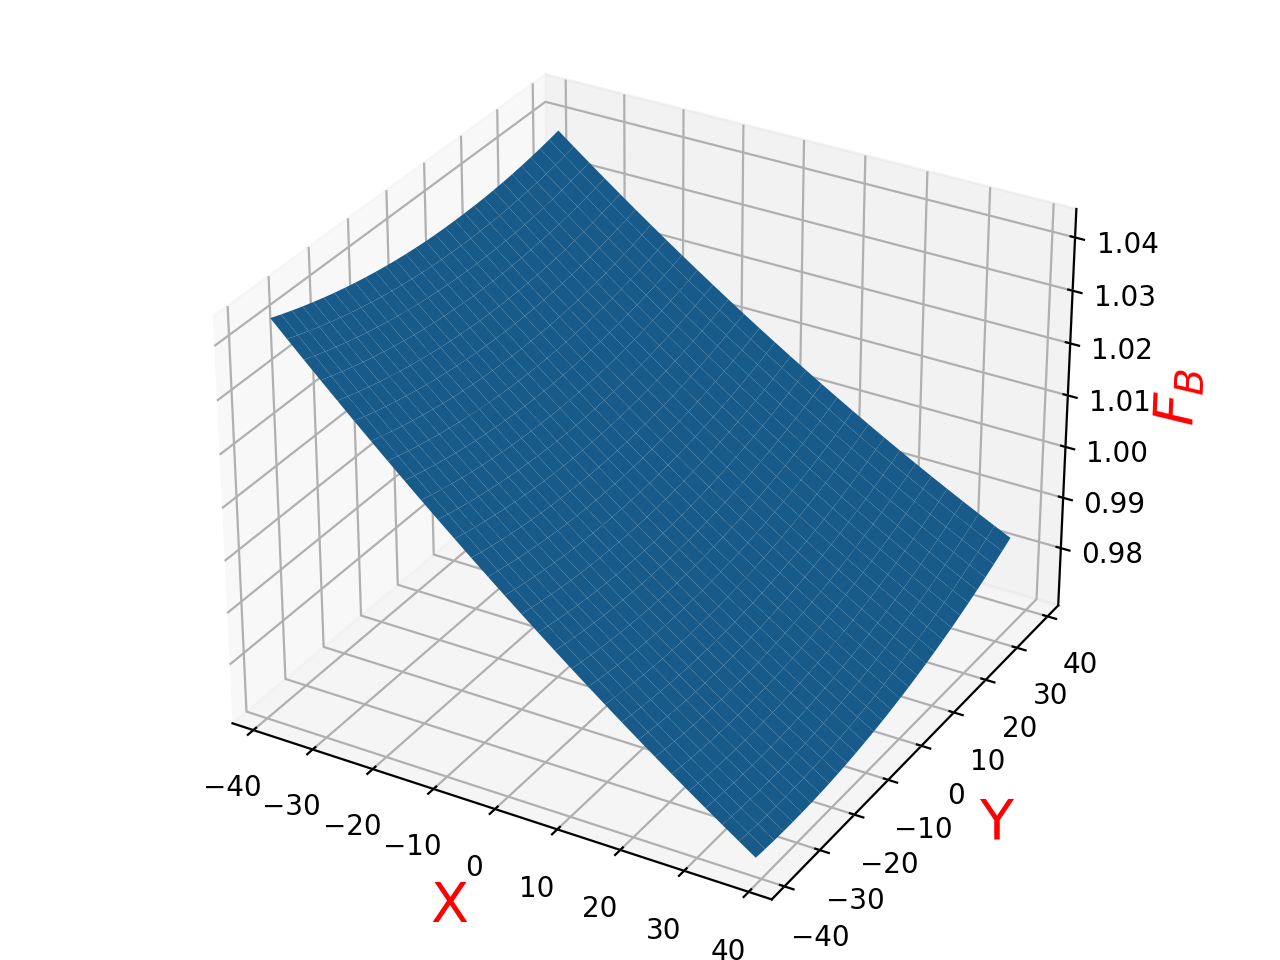

<IPython.core.display.Javascript object>


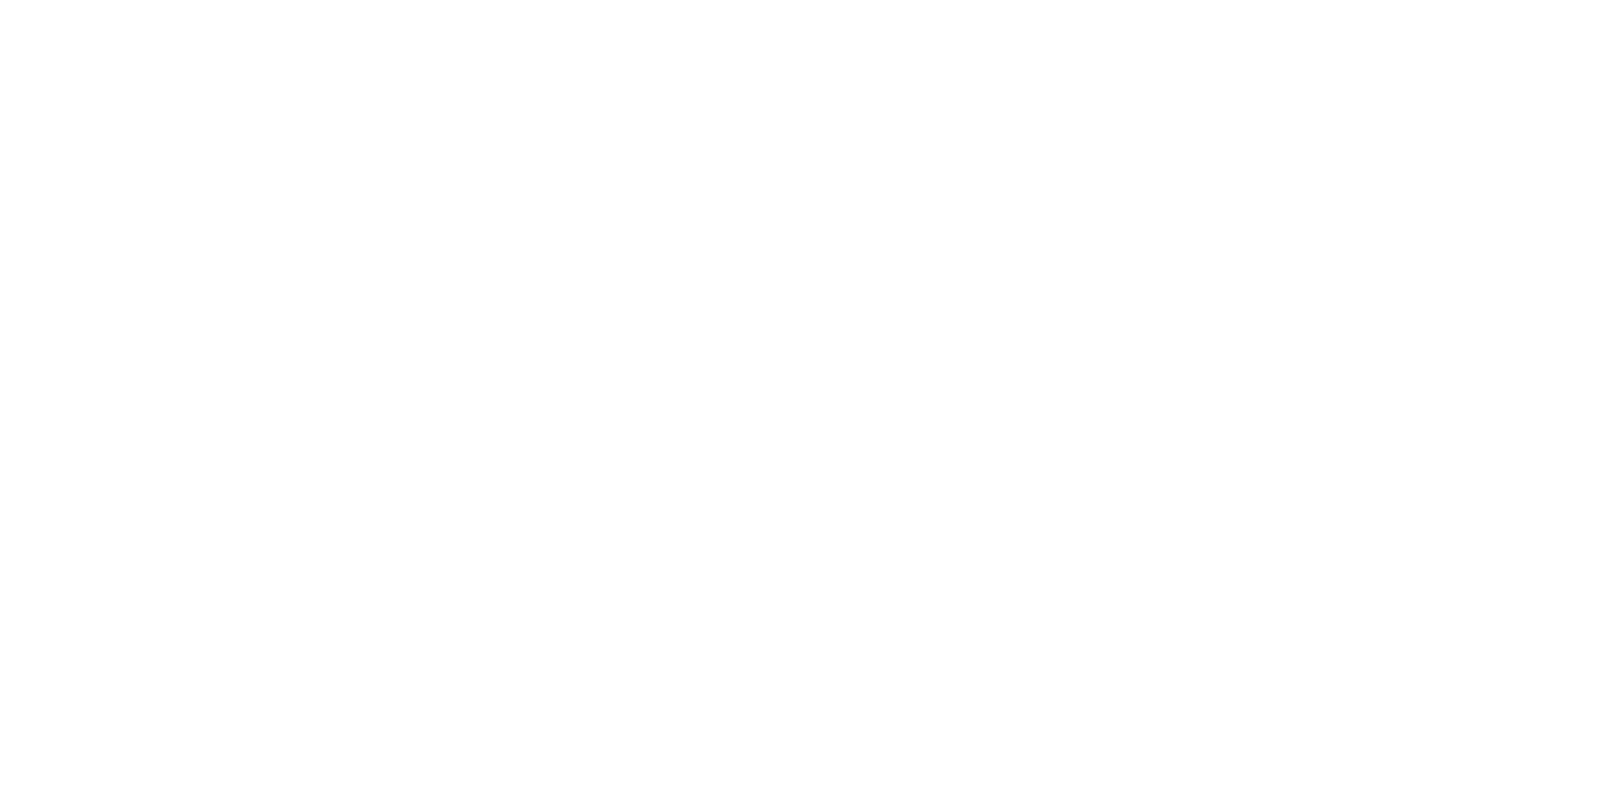

Iteration: 0 Bowl correction
Peaks in the 2D histogram [array([13.8671875]), array([15.8203125])]
Maximum pick value: [57.48813945] right-left side of the peak: [56.78717086 58.48952316]
Mass resolving power (MRP --> m/m_2-m_1): [23.08340745]
(array([74], dtype=int64),)



<IPython.core.display.Javascript object>


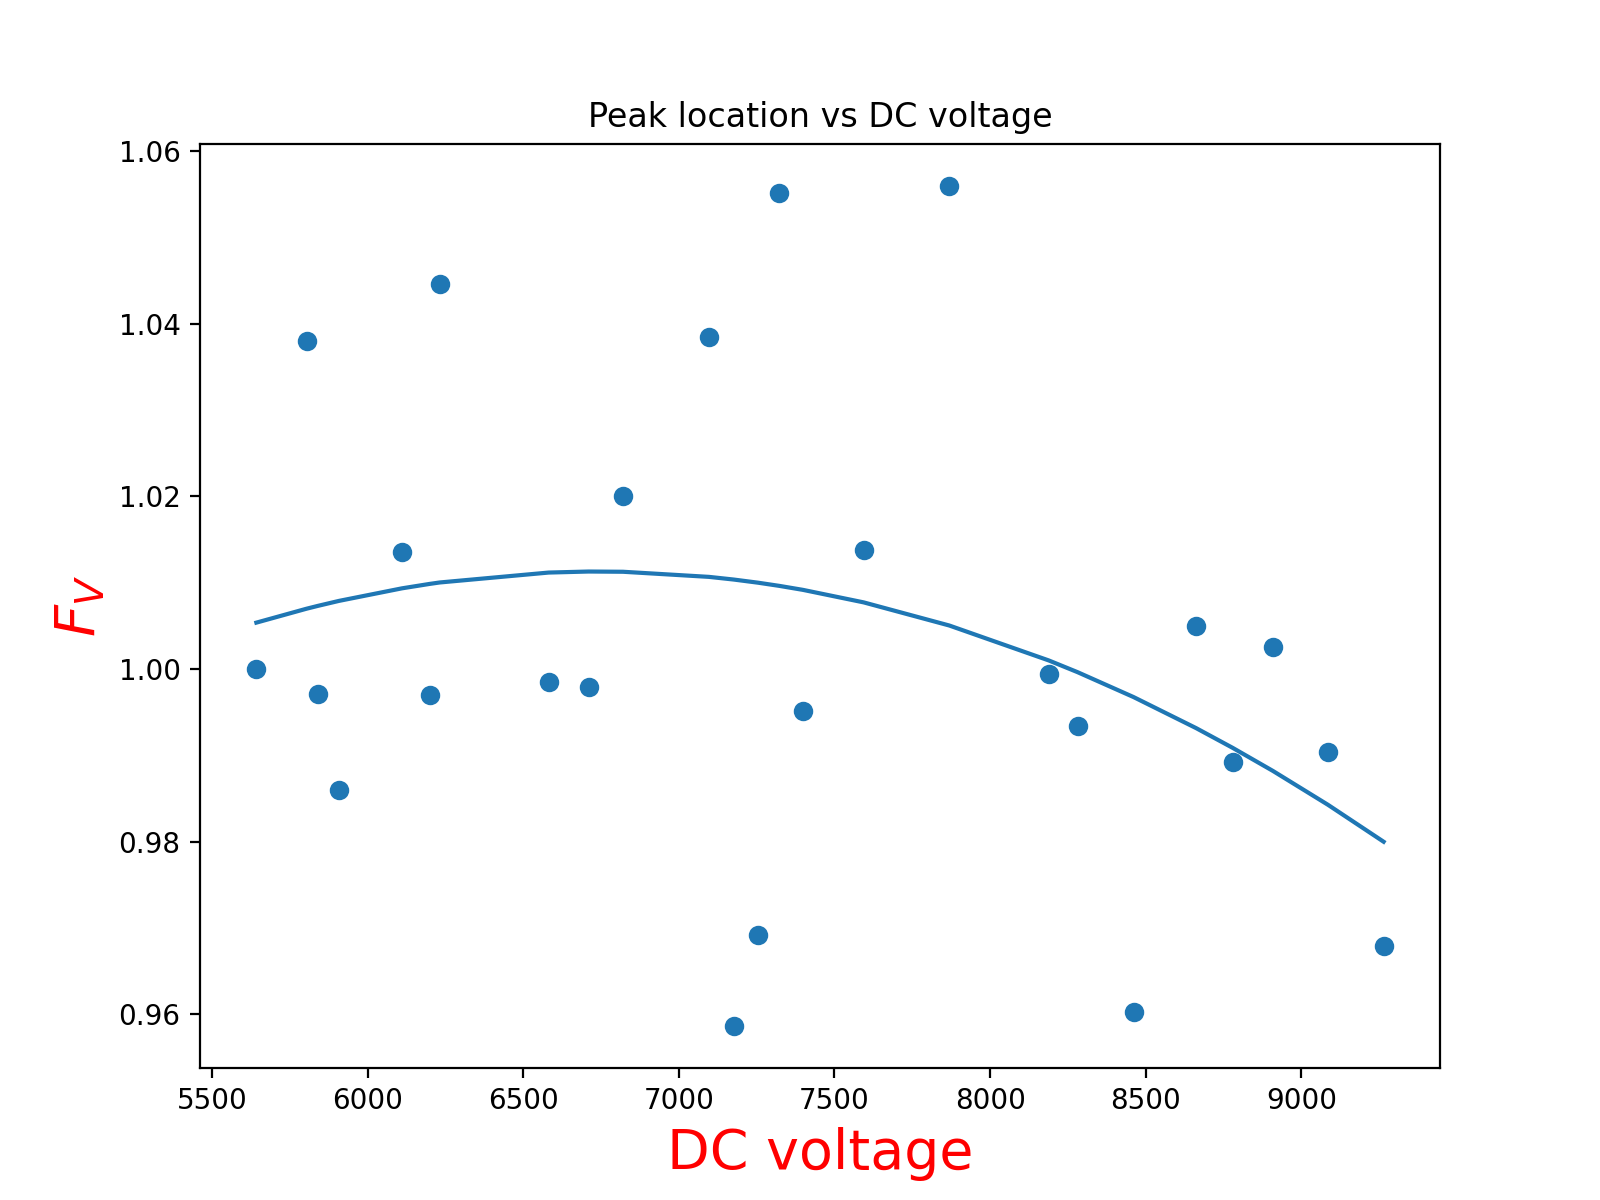

<IPython.core.display.Javascript object>


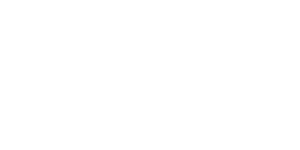

Iteration: 1 Voltage correction
Peaks in the 2D histogram [array([13.8671875]), array([15.4296875])]
Maximum pick value: [56.85980028] right-left side of the peak: [56.25925977 58.06088129]
Mass resolving power (MRP --> m/m_2-m_1): [31.56034703]


<IPython.core.display.Javascript object>


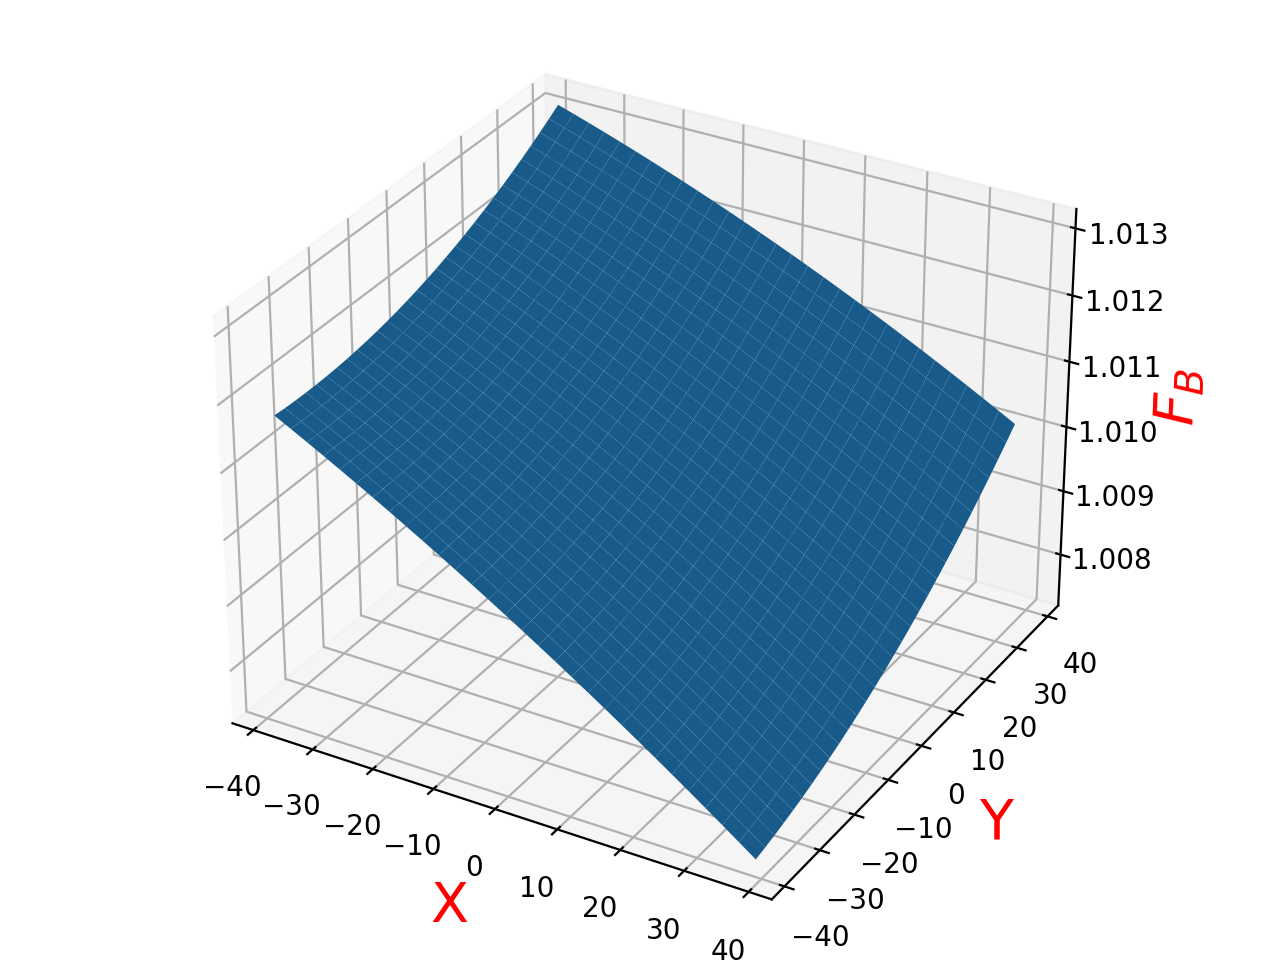

<IPython.core.display.Javascript object>


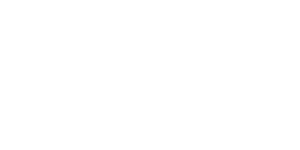

Iteration: 1 Bowl correction
Peaks in the 2D histogram [array([13.8671875]), array([15.4296875])]
Maximum pick value: [56.3483196] right-left side of the peak: [55.64782524 57.44909644]
Mass resolving power (MRP --> m/m_2-m_1): [31.56034703]
(array([72], dtype=int64),)



<IPython.core.display.Javascript object>


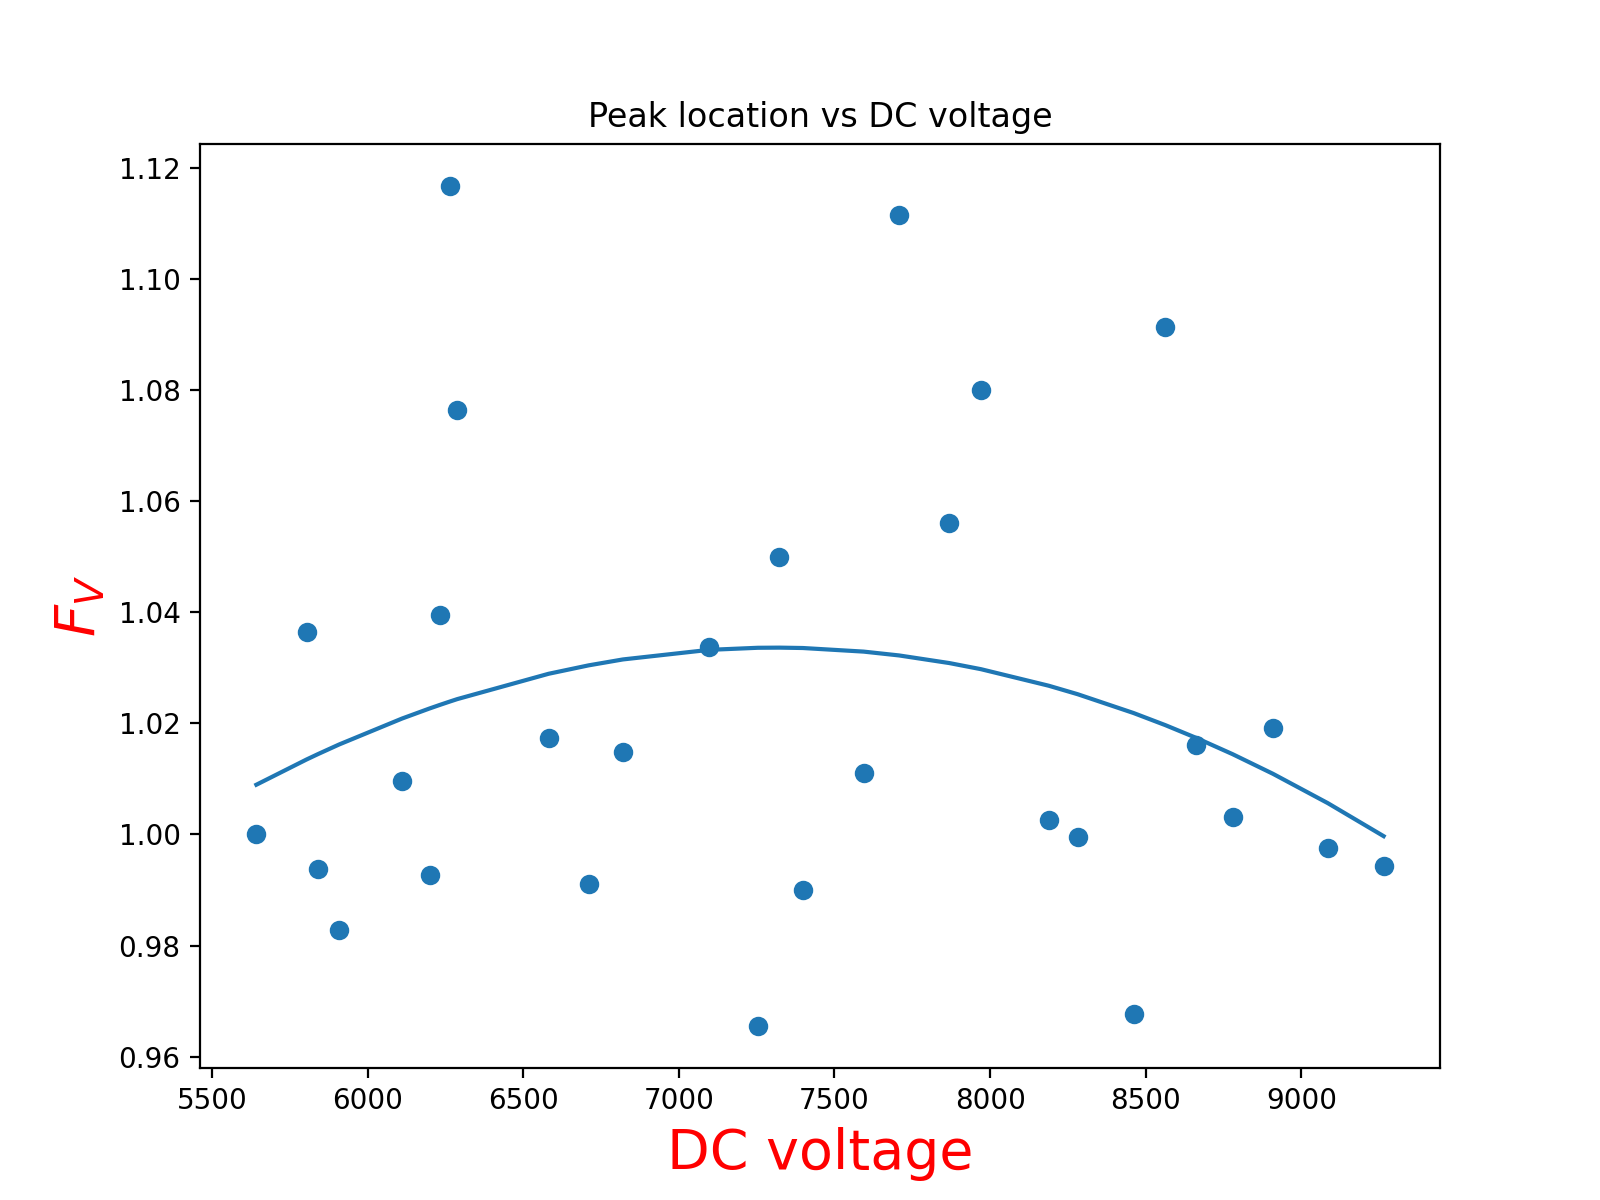

<IPython.core.display.Javascript object>


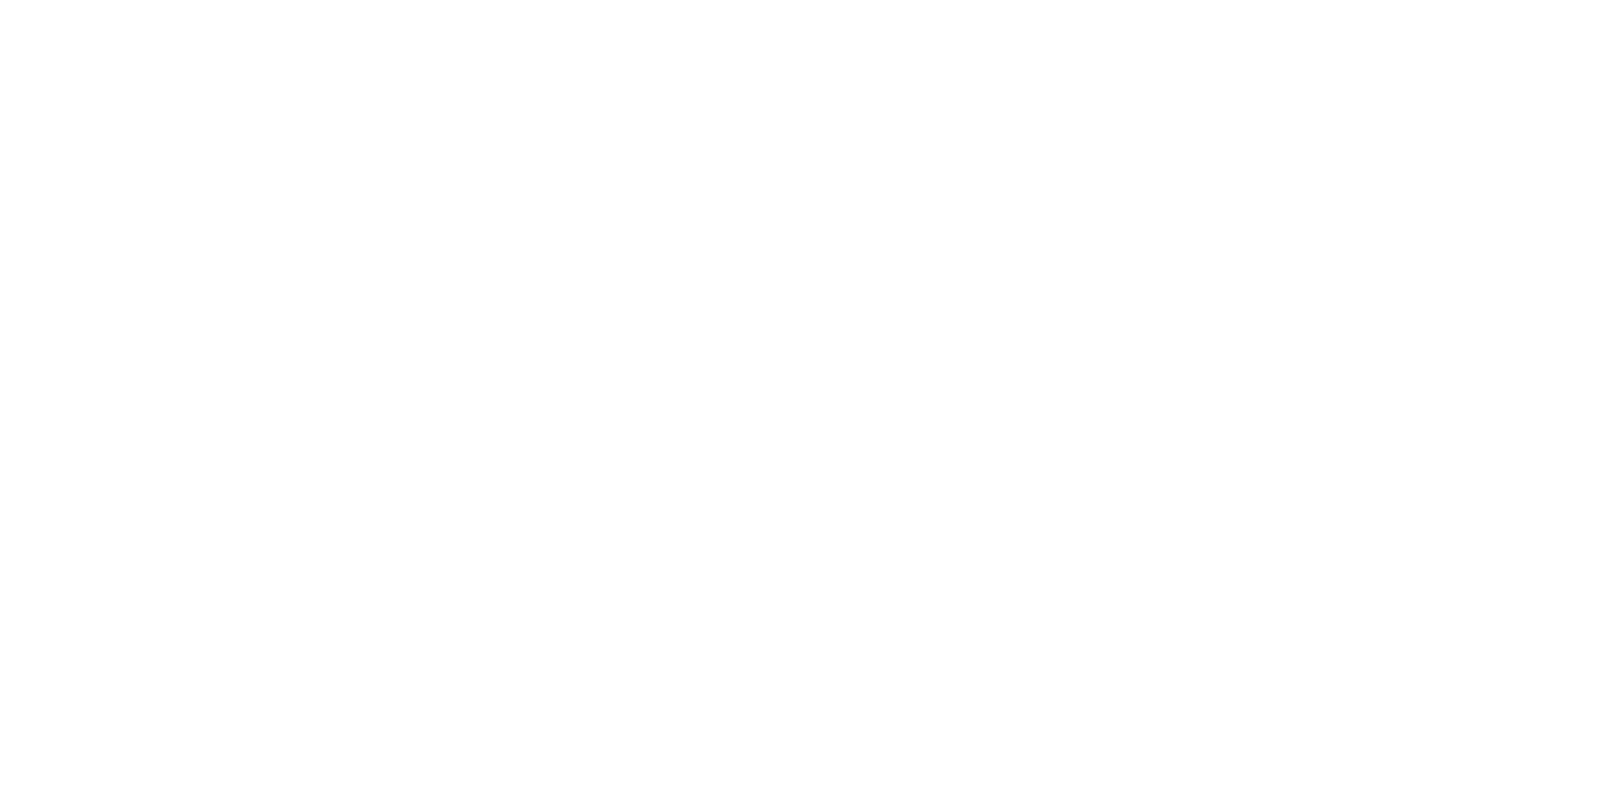

Iteration: 2 Voltage correction
Peaks in the 2D histogram [array([13.671875]), array([16.015625])]
Maximum pick value: [55.05467901] right-left side of the peak: [54.15392138 56.35577337]
Mass resolving power (MRP --> m/m_2-m_1): [25.00380555]


<IPython.core.display.Javascript object>


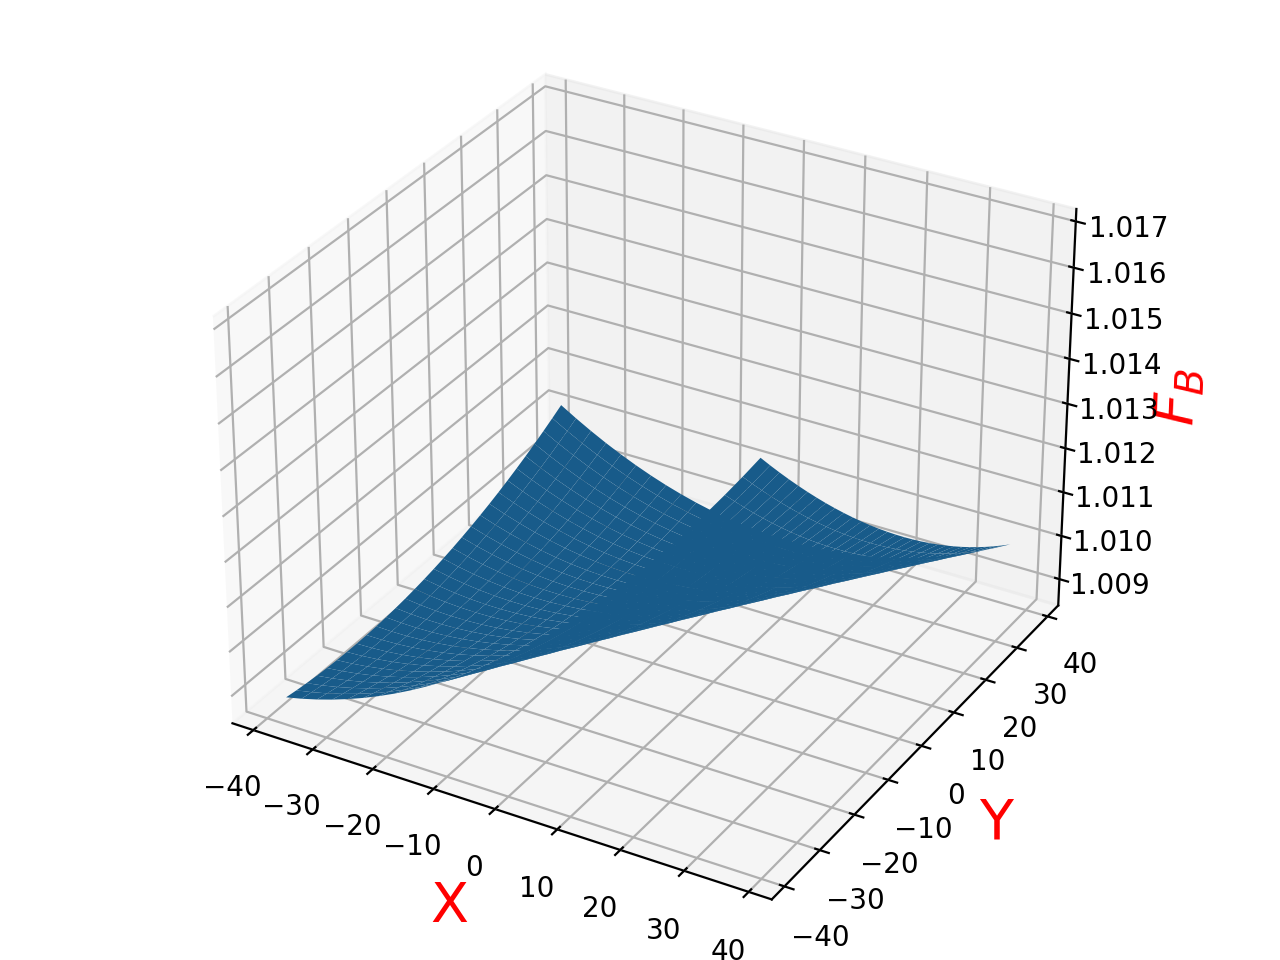

<IPython.core.display.Javascript object>


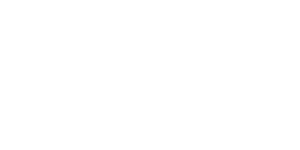

Iteration: 2 Bowl correction
Peaks in the 2D histogram [array([13.671875]), array([16.015625])]
Maximum pick value: [54.58251397] right-left side of the peak: [53.68128801 55.78414859]
Mass resolving power (MRP --> m/m_2-m_1): [25.00380555]
(array([70], dtype=int64),)



<IPython.core.display.Javascript object>


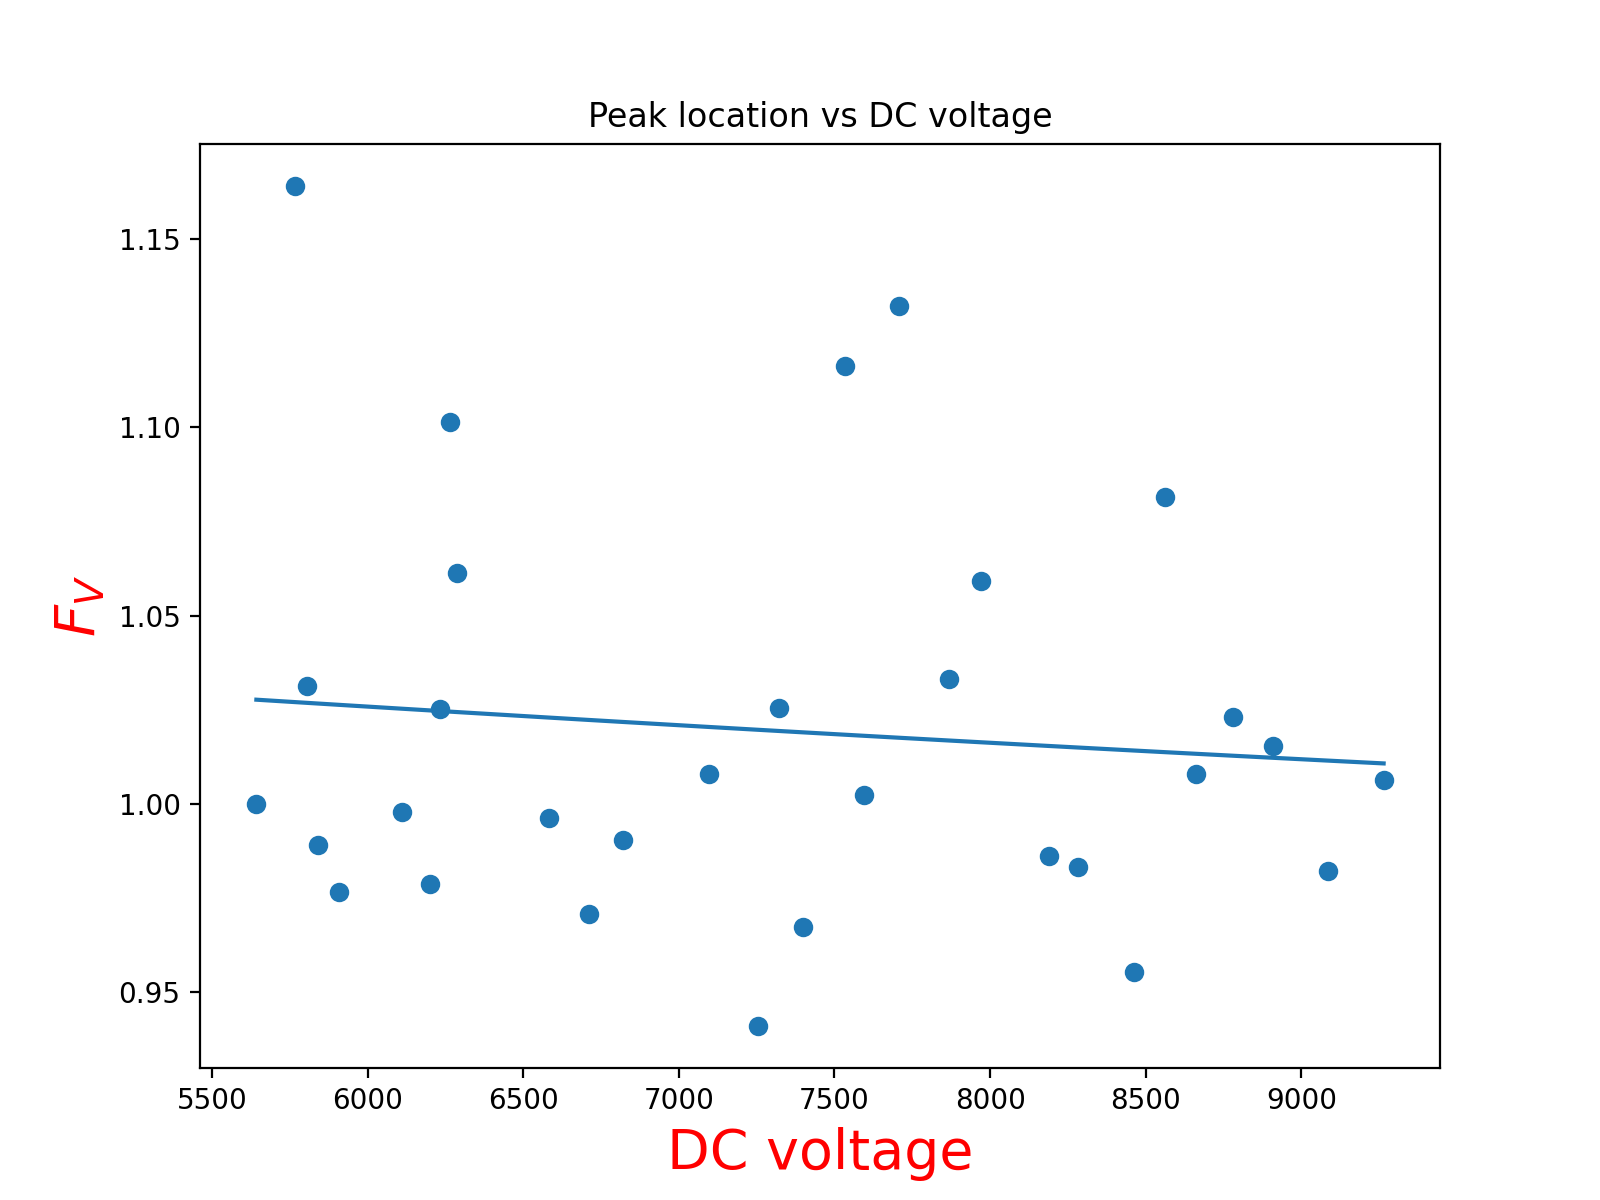

<IPython.core.display.Javascript object>


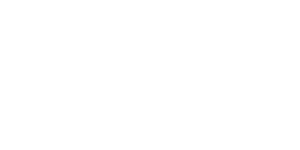

Iteration: 3 Voltage correction
Peaks in the 2D histogram [array([13.0859375]), array([16.6015625])]
Maximum pick value: [53.38323177] right-left side of the peak: [52.48196267 54.58492392]
Mass resolving power (MRP --> m/m_2-m_1): [25.38479096]


<IPython.core.display.Javascript object>


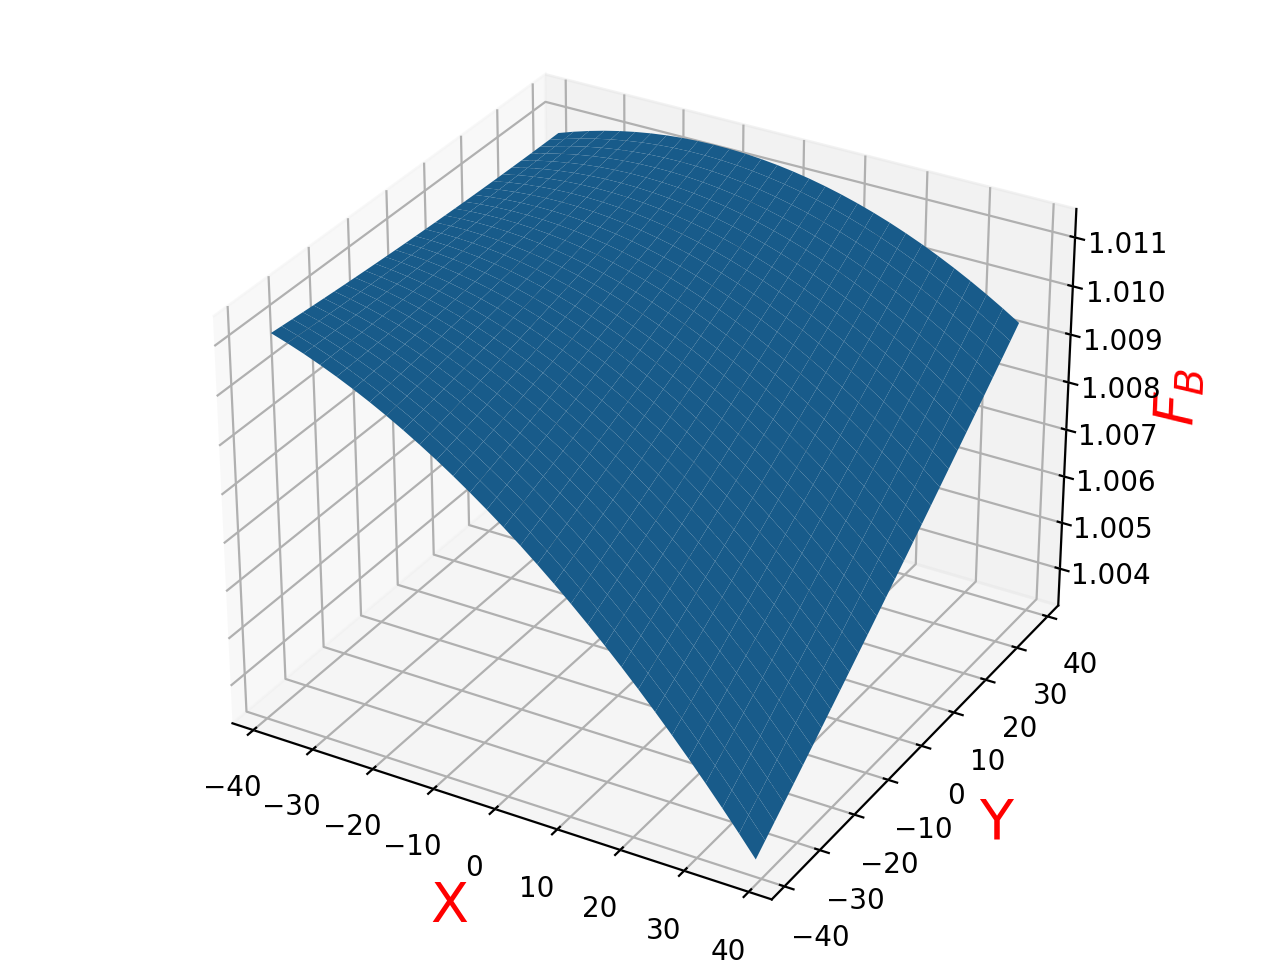

<IPython.core.display.Javascript object>


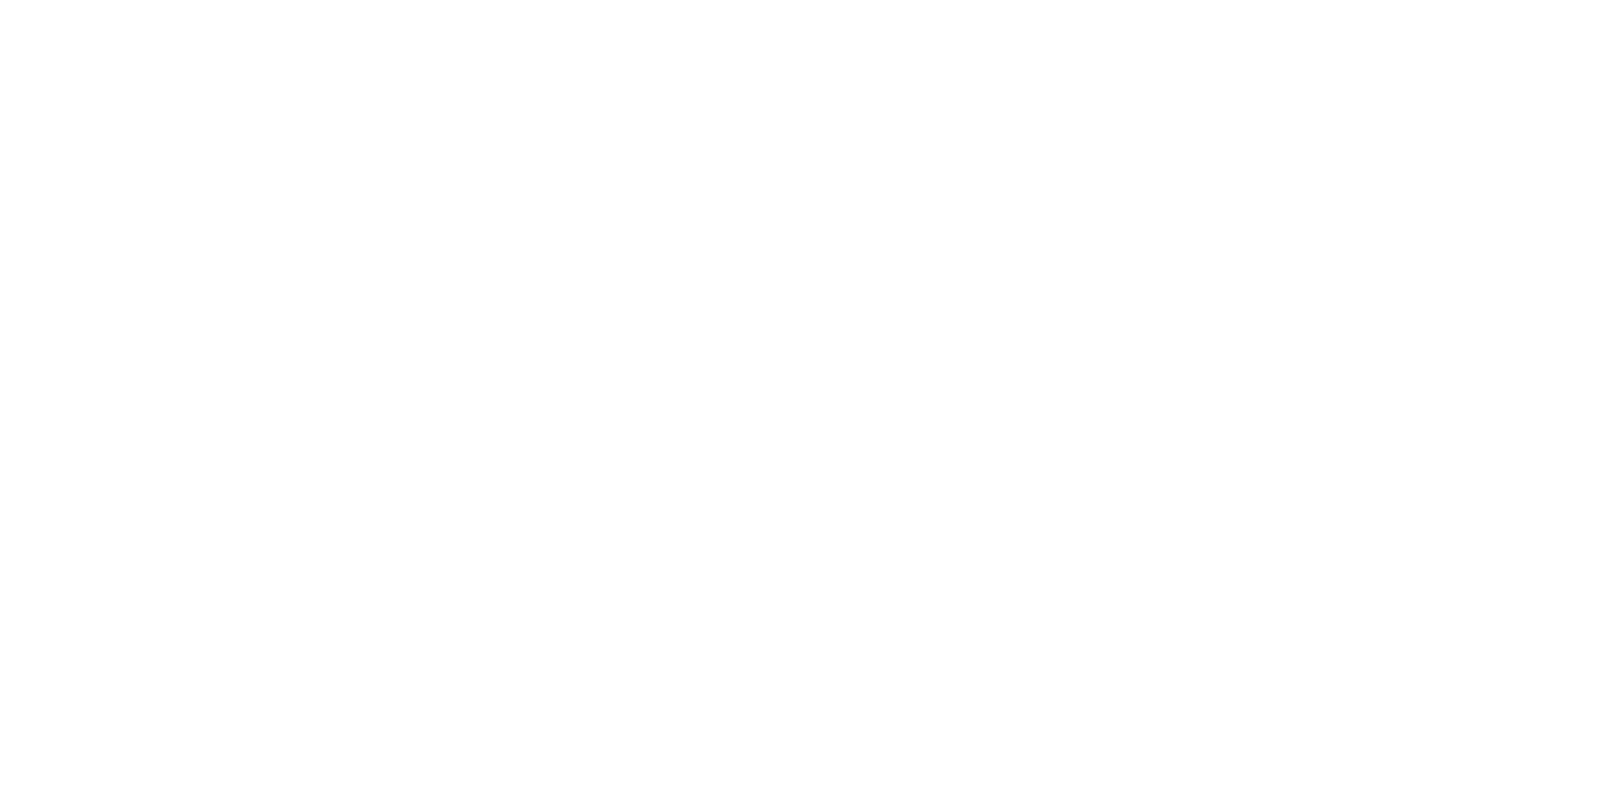

Iteration: 3 Bowl correction
Peaks in the 2D histogram [array([13.0859375]), array([16.6015625])]
Maximum pick value: [52.83836403] right-left side of the peak: [51.93784678 54.0390537 ]
Mass resolving power (MRP --> m/m_2-m_1): [25.38479096]


In [46]:
while True:
    fitPeak = tools.history_ex(mc_temp, dld_highVoltage, mean_t,mc_max=400, plot=False)
    corrFac_voltage = tools.voltage_corr(dld_highVoltage, mc_temp, fitPeak, ionsPerFitSegment, plot=True, fig_name='%s_'%break_i + figname)
    mc_temp2 = mc_temp / corrFac_voltage
    max_hist, left_right_peaks, peaks_sides, max_paek_edges, index_max = tools.massSpecPlot(mc_temp2[mc_temp2 < 100], 0.1, plot=False)
    mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
    if mrp_final < mrp and break_i != 0:
        mrp_final = mrp
        mc_f = mc_temp2
    print('Iteration:', iteration, 'Voltage correction')
    print('Peaks in the 2D histogram', fitPeak)
    print('Maximum pick value:',max_hist , 'right-left side of the peak:', left_right_peaks)
    print('Mass resolving power (MRP --> m/m_2-m_1):', mrp)
    corrFac_bowl = tools.bowl_corr(dld_x, dld_y, mc_temp2, mcIdeal=max_hist, mc_min=max_paek_edges[0], mc_max=max_paek_edges[1], plot=True, fig_name='%s_'%break_i + figname)
    mc_temp3 = mc_temp2 / corrFac_bowl
    max_hist, left_right_peaks, peaks_sides, max_paek_edges, index_max = tools.massSpecPlot(mc_temp3[mc_temp3 < 100], 0.1, plot=False)
    mc_temp = mc_temp3
    
    print('Iteration:', iteration, 'Bowl correction')
    print('Peaks in the 2D histogram', fitPeak)
    print('Maximum pick value:',max_hist , 'right-left side of the peak:', left_right_peaks)
    print('Mass resolving power (MRP --> m/m_2-m_1):', mrp)
    if mrp_final < mrp and break_i != 0:
        mrp_final = mrp
        mc_f = mc_temp
    else:
        if break_i == 3:
            break
        break_i += 1

    iteration += 1


$\text{Peak the peaks that you want to use for linear correcction by slecting the red cross on top of the peak}$

<IPython.core.display.Javascript object>


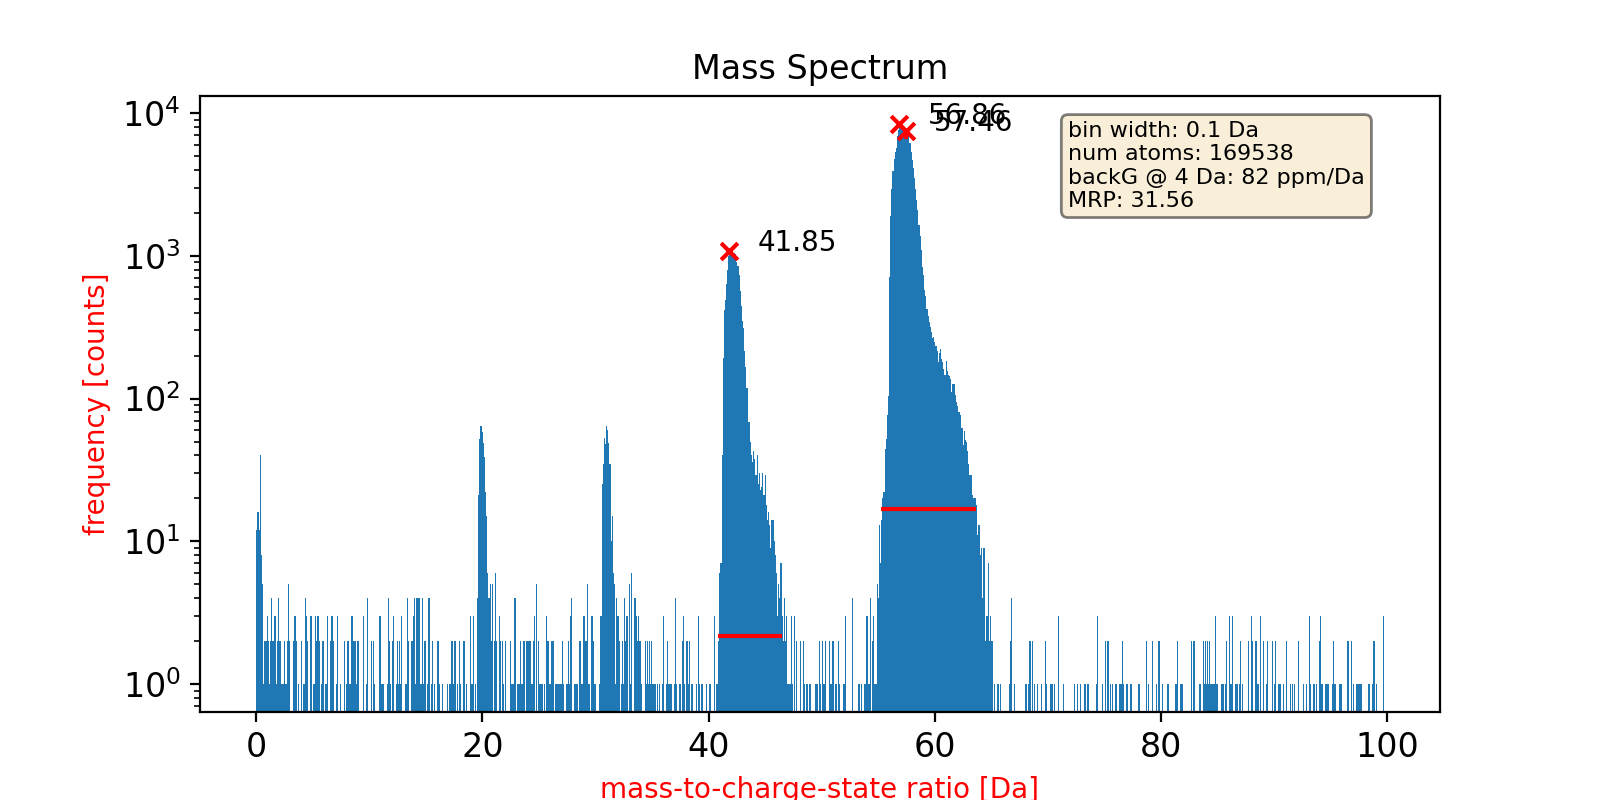

In [47]:
max_hist, left_right_peaks, peaks_sides, max_paek_edges, index_max = tools.massSpecPlot(mc_f[mc_f < 100], 0.1, plot=True, prominence=100, fig_name='cor_'+figname, text_loc='right')

In [16]:
for i in range(len(peaks_sides)):
    print('Peaks ', i, 'is: {:.2f}'.format(peaks_sides[i,0]))

Peaks  0 is: 10.41
Peaks  1 is: 22.32


$\text{Here we should choose the m/c for the selected above peak}$

In [17]:
isotopeTableFile = '../../../../files/isotopeTable.h5'
dataframe = data_tools.read_hdf5_through_pandas(isotopeTableFile)
elementsList = dataframe['element']
elementIsotopeList = dataframe['isotope']
elementMassList =  dataframe['weight']
abundanceList = dataframe['abundance']

elements = list(zip(elementsList,elementIsotopeList,elementMassList,abundanceList))
dropdownList = []
for element in elements:
    tupleElement = ("{} ({}) ({:.2f})".format(element[0],element[1],element[3]),element[2],)
    dropdownList.append(tupleElement)

chargeList = [(1,1,),(2,2,),(3,3,),(4,4,)]
dropdown = wd.dropdownWidget(dropdownList,"Elements")
dropdown.observe(wd.on_change)


chargeDropdown = wd.dropdownWidget(chargeList,"Charge")
chargeDropdown.observe(wd.on_change_charge)

wd.compute_element_isotope_values_according_to_selected_charge()

buttonAdd = wd.buttonWidget("ADD")
buttonDelete = wd.buttonWidget("DELETE")
buttonReset = wd.buttonWidget("RESET")

display(dropdown)
display(chargeDropdown)
display(buttonAdd)
display(buttonDelete)
display(buttonReset)
listMaterial = buttonAdd.on_click(wd.onClickAdd)
buttonDelete.on_click(wd.onClickDelete)
buttonReset.on_click(wd.onClickReset)

Dropdown(description='Elements', options=(('H (1) (99.98)', 1.01), ('H (2) (0.01)', 2.01), ('He (3) (0.00)', 3…

Dropdown(description='Charge', options=((1, 1), (2, 2), (3, 3), (4, 4)), value=1)

Button(description='ADD', icon='check', style=ButtonStyle(), tooltip='ADD')

Button(description='DELETE', icon='check', style=ButtonStyle(), tooltip='DELETE')

Button(description='RESET', icon='check', style=ButtonStyle(), tooltip='RESET')

In [18]:
peaks_chos = []
for i in range(len(variables.peaks_idx)):
    peaks_chos.append(peaks_sides[variables.peaks_idx[i],0])
peaks_chos = np.array(peaks_chos)
listMaterial = np.array(listMaterial)
print('highest peak in the mc histogram:', peaks_chos)
print('highest peak in the ideal mc histogram:', variables.listMaterial)

highest peak in the mc histogram: [10.41373471 22.32308482]
highest peak in the ideal mc histogram: [13.49, 26.98]


$\text{Above you should see the selected peak values and the ideal m/c for them seperatly. By runing the below cell linear correction aplies on the m/c and the final result is plotted}$

In [19]:
# For quadratic you need at least 3 points
mc_final = tools.linear_correction(mc_f, peaks_chos, np.array(variables.listMaterial), kind='linear')

[1.29540461 1.20861432]


<IPython.core.display.Javascript object>


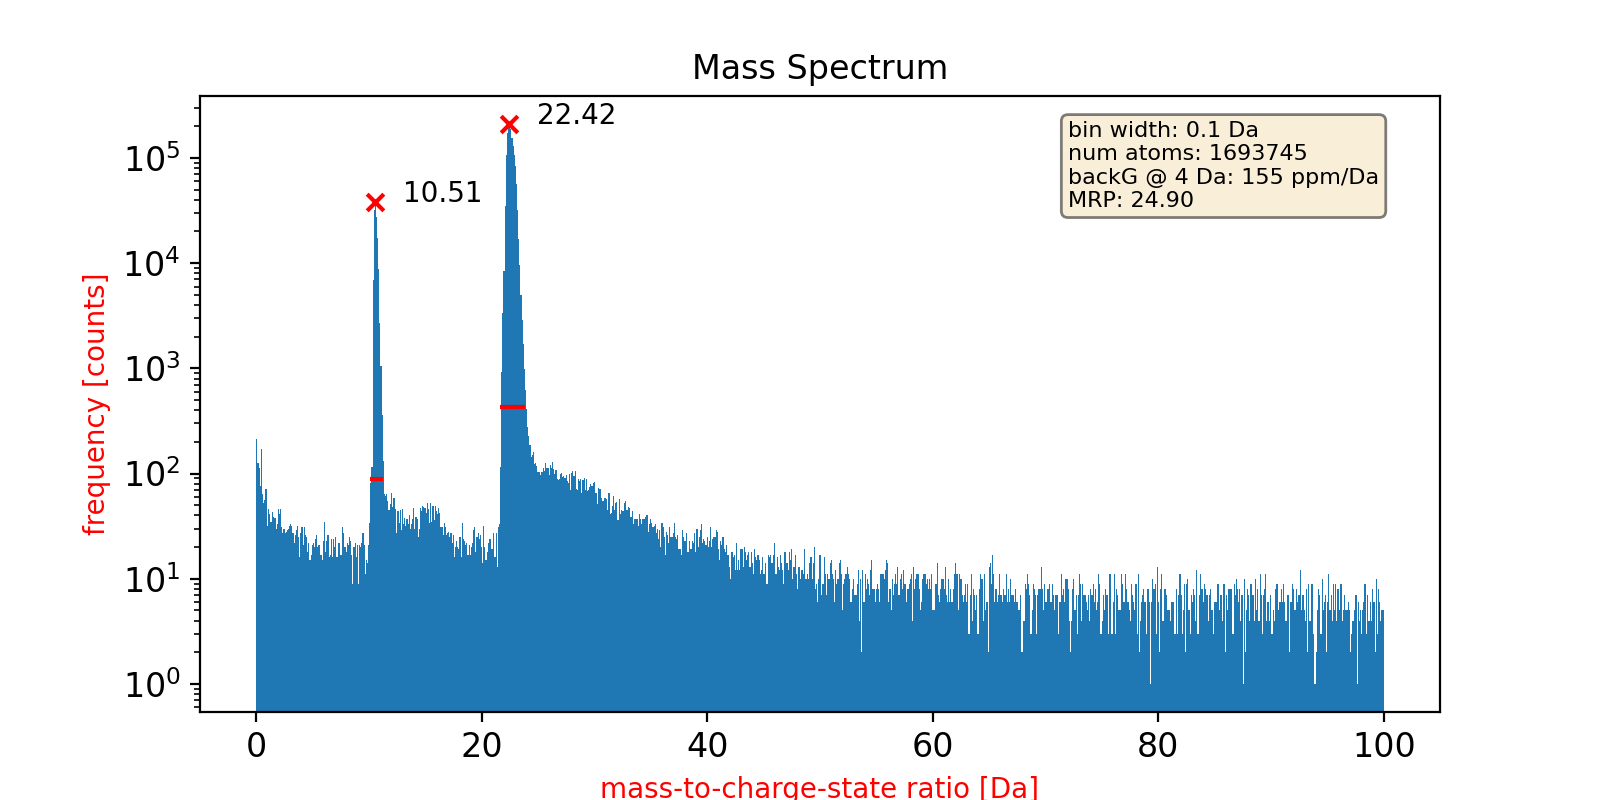

Mass resolving power for the highest peak (MRP --> m/m_2-m_1): [24.89528023]


<IPython.core.display.Javascript object>


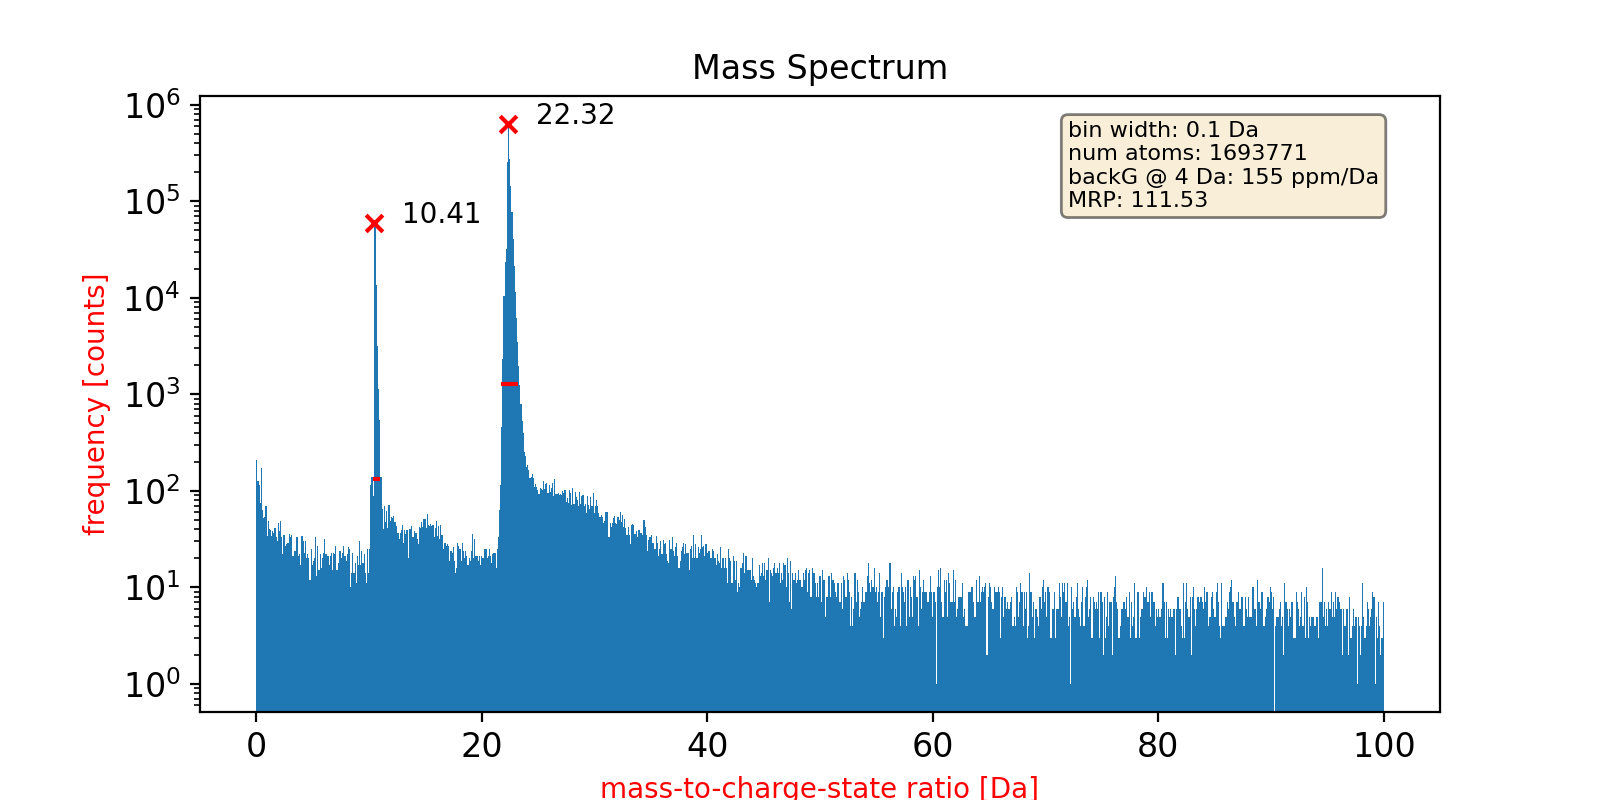

Mass resolving power for the highest peak (MRP --> m/m_2-m_1): [111.52779414]


<IPython.core.display.Javascript object>


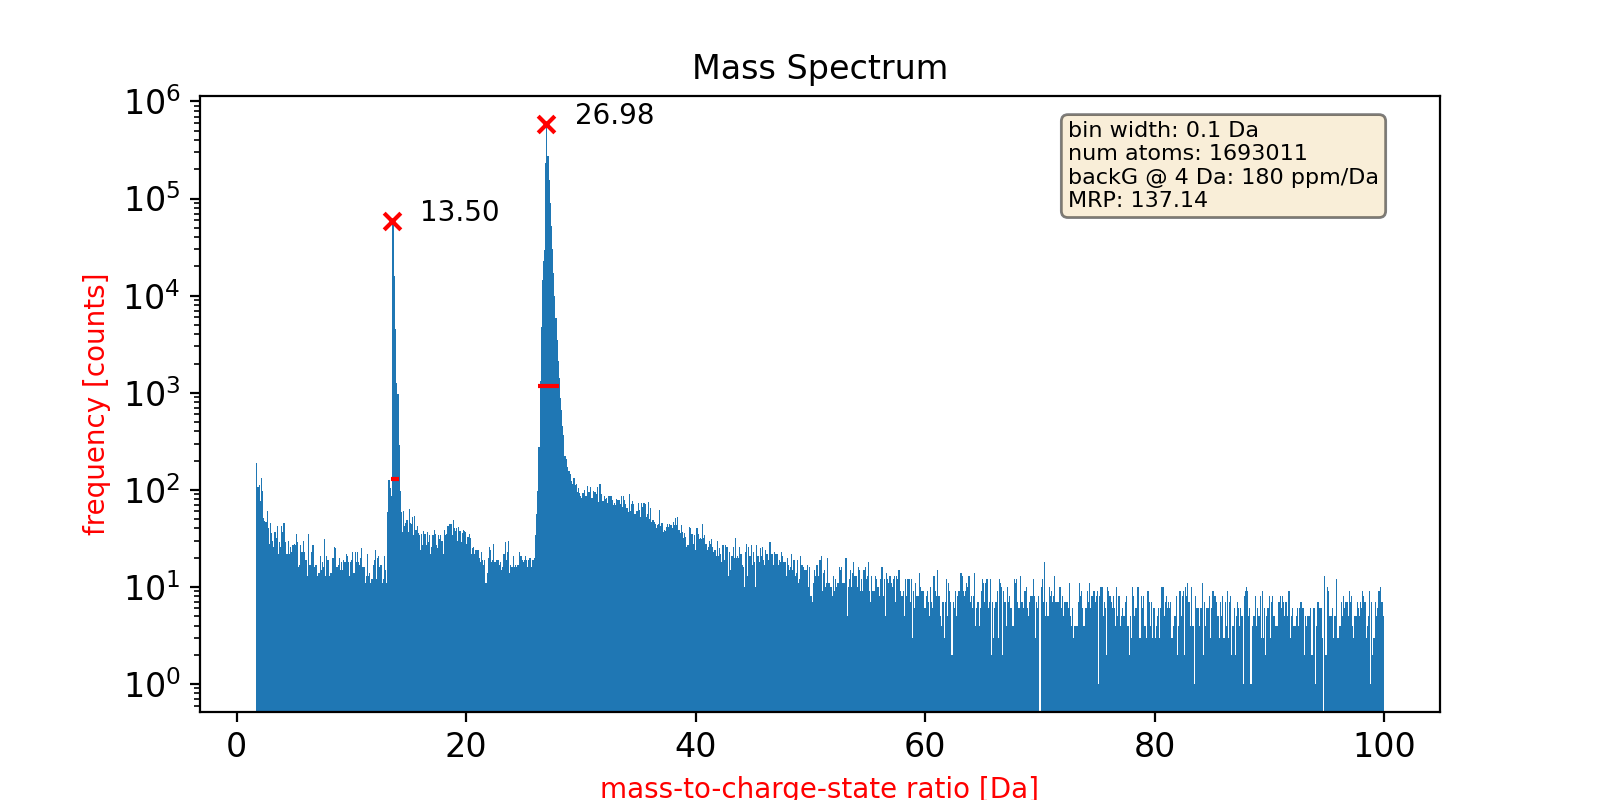

Mass resolving power for the highest peak (MRP --> m/m_2-m_1): [137.14414451]


In [20]:
max_hist, left_right_peaks, peaks_sides, max_paek_edges, index_max = tools.massSpecPlot(mc_seb[mc_seb < 100], 0.1, plot=True)
mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
print('Mass resolving power for the highest peak (MRP --> m/m_2-m_1):', mrp)
max_hist, left_right_peaks, peaks_sides, max_paek_edges, index_max  = tools.massSpecPlot(mc_f[mc_f < 100], 0.1, plot=True, prominence=800, fig_name=None, text_loc='right')
mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
print('Mass resolving power for the highest peak (MRP --> m/m_2-m_1):', mrp)
max_hist, left_right_peaks, peaks_sides, max_paek_edges, index_max  = tools.massSpecPlot(mc_final[mc_final < 100], 0.1, plot=True, prominence=800, fig_name='linear_cor_'+figname, text_loc='right')
mrp = (max_hist / (left_right_peaks[1] - left_right_peaks[0]))
print('Mass resolving power for the highest peak (MRP --> m/m_2-m_1):', mrp)